<a href="https://colab.research.google.com/github/MennaAyman5/model1/blob/main/knnms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing classes**

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving knn data.data to knn data.data


In [ ]:
df= pd.read_csv('knn data.data') 

## **information about data**

In [ ]:
df.head()

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.shape

(699, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df.describe()

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# **cleaning data**

### find duplicates

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)


### null values

In [ ]:
df.isnull().sum(axis = 0)

id                             0
Clump Thickness                0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
class                          0
dtype: int64

In [ ]:
df.empty

False

In [ ]:
df.dtypes

id                              int64
Clump Thickness                 int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
class                           int64
dtype: object

### column with missing values
       *convert missing to nan
       *replace nan with median of values
       *convert from object to float to int64

In [ ]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df["Bare Nuclei"].replace('?', np.nan , inplace=True)

df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [ ]:
df['Bare Nuclei']=df['Bare Nuclei'].fillna(df["Bare Nuclei"].median())


In [ ]:
df['Bare Nuclei'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           691 non-null    int64 
 1   Clump Thickness              691 non-null    int64 
 2   Cell Size                    691 non-null    int64 
 3   Cell Shape                   691 non-null    int64 
 4   Marginal Adhesion            691 non-null    int64 
 5   Single Epithelial Cell Size  691 non-null    int64 
 6   Bare Nuclei                  691 non-null    object
 7   Bland Chromatin              691 non-null    int64 
 8   Normal Nucleoli              691 non-null    int64 
 9   Mitoses                      691 non-null    int64 
 10  class                        691 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.8+ KB


In [ ]:
df["Bare Nuclei"]=pd.to_numeric(df["Bare Nuclei"])
df["Bare Nuclei"].dtypes

dtype('float64')

In [ ]:
df = df.astype({"Bare Nuclei":'int'})


In [ ]:
df.dtypes

id                             int64
Clump Thickness                int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
class                          int64
dtype: object

### drop useless column

In [ ]:
df.drop(columns=["id"],axis=1,inplace=True)
df.head(1)

,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
0,5,1,1,1,2,1,3,1,1,2


# **visulation**

### univaratie

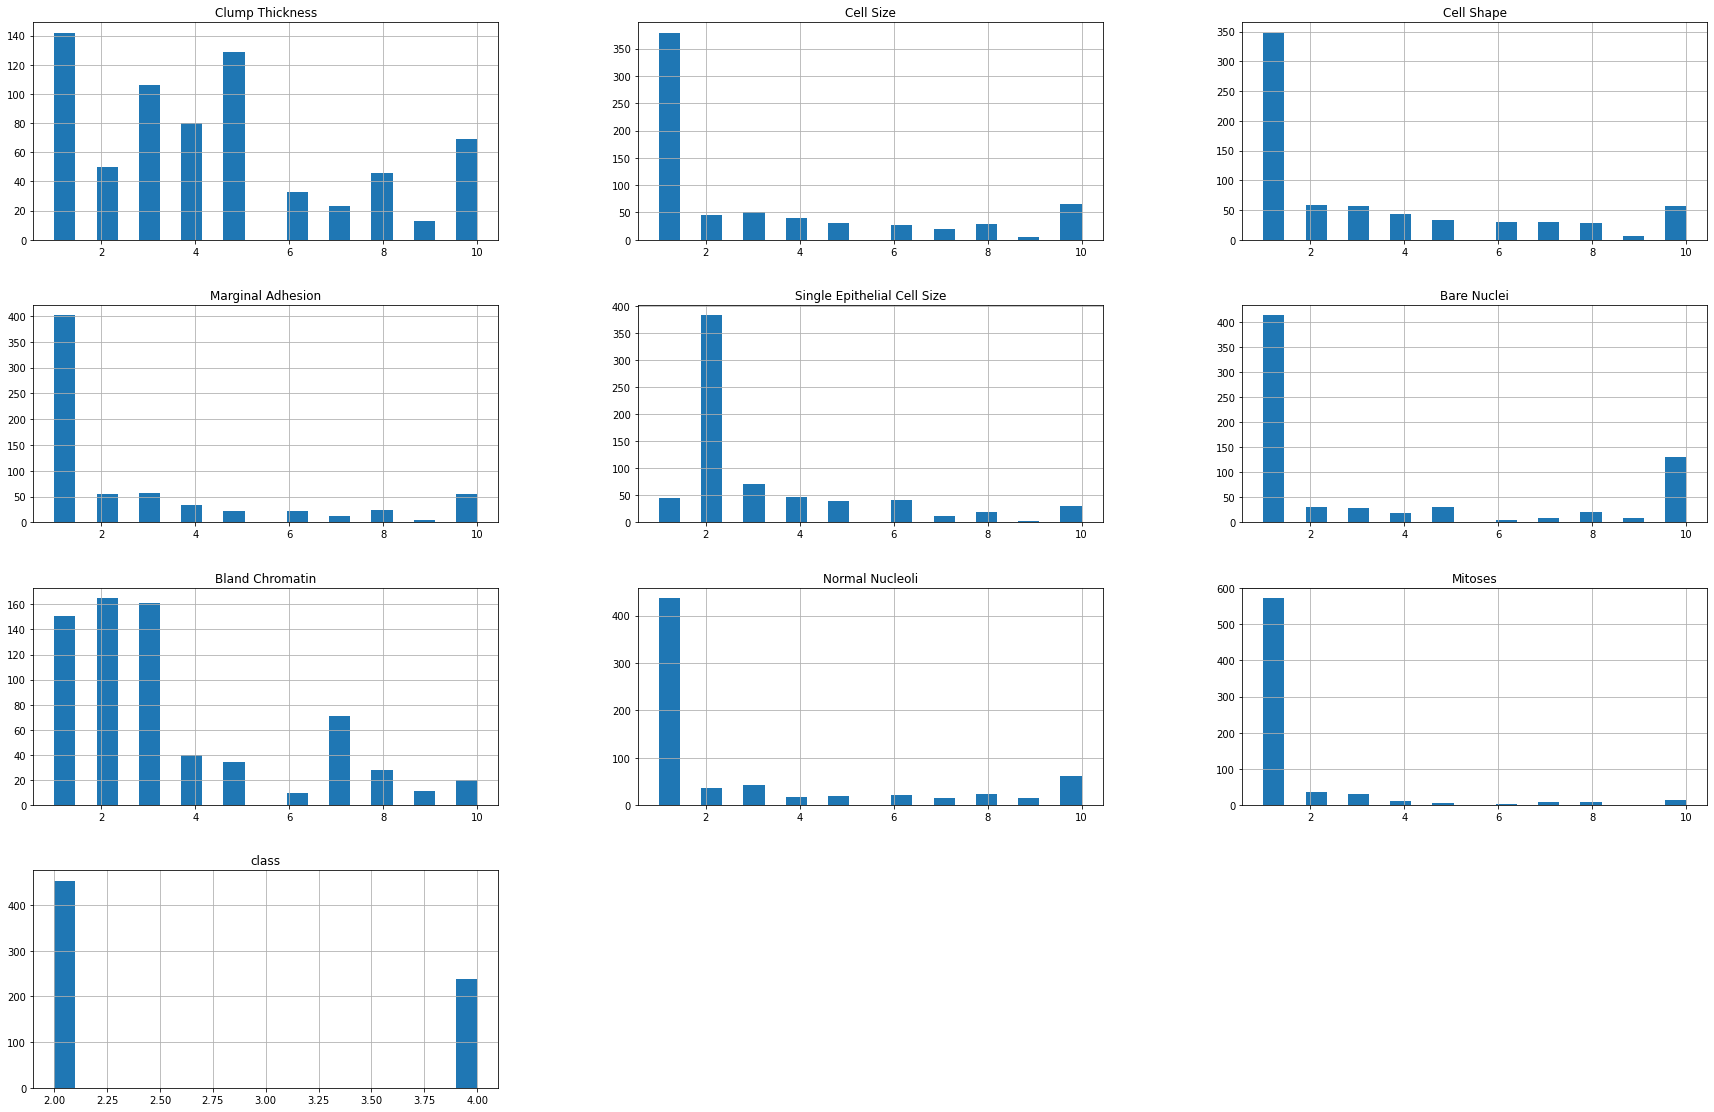

In [ ]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

### multivariate

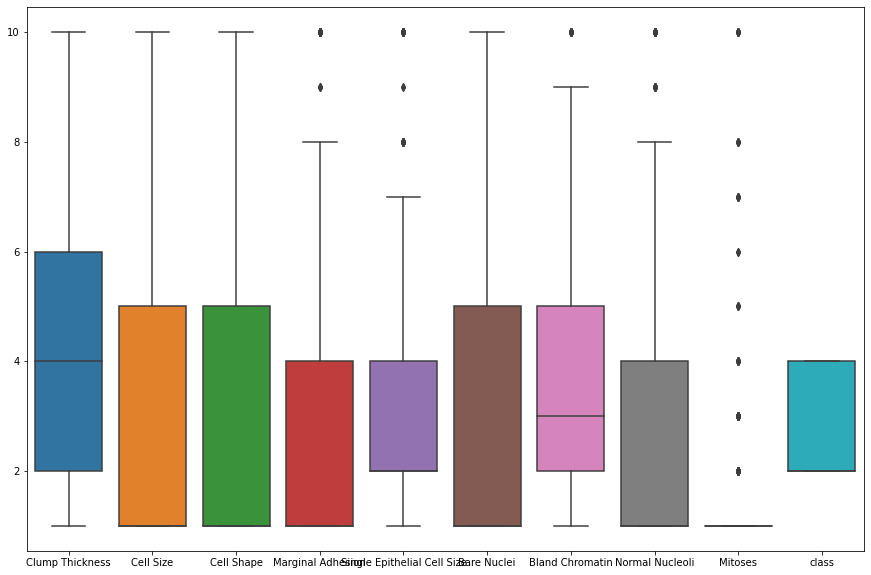

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

### relationship between each column to others

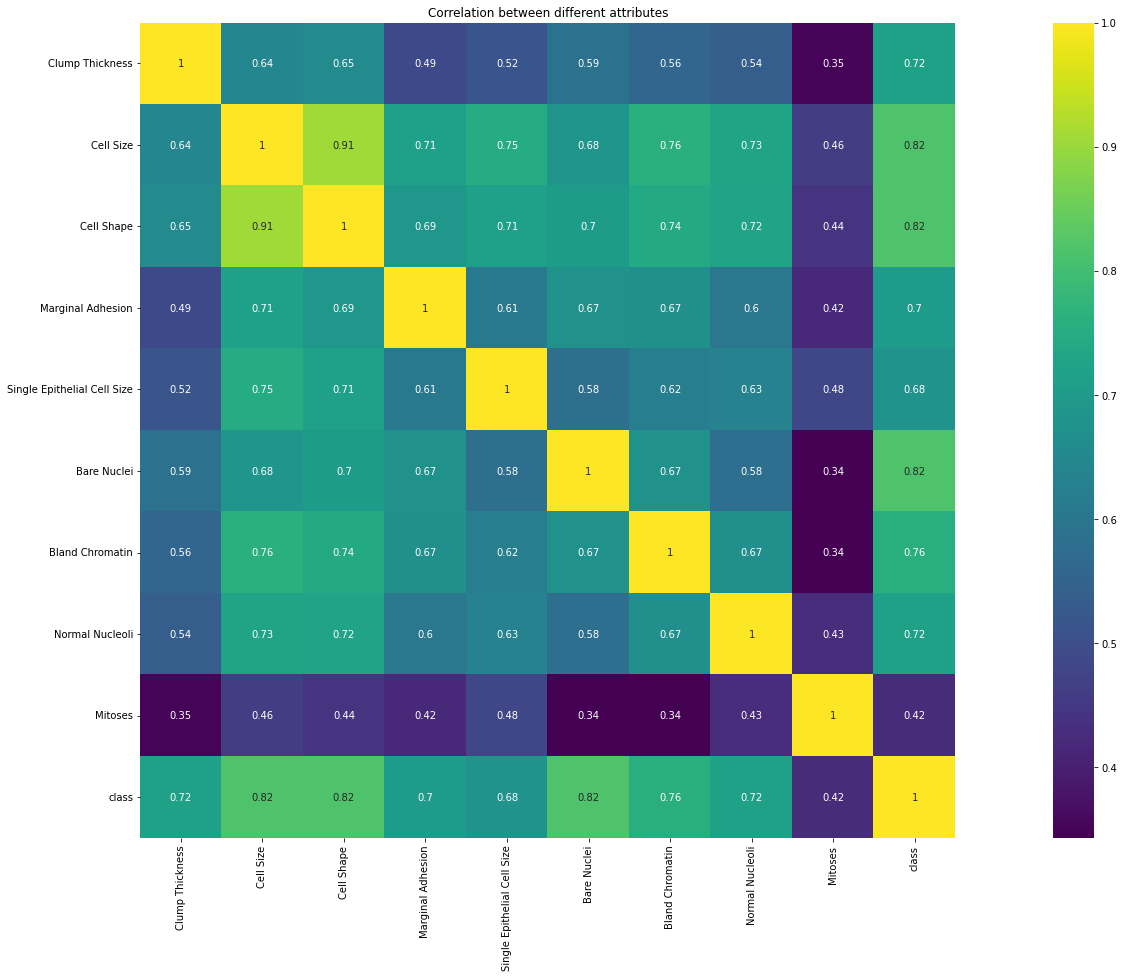

In [ ]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1,square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

# knn model

In [ ]:
x=df.iloc[:,0:8].values

In [ ]:
x

array([[ 5,  1,  1, ...,  1,  3,  1],
       [ 5,  4,  4, ..., 10,  3,  2],
       [ 3,  1,  1, ...,  2,  3,  1],
       ...,
       [ 5, 10, 10, ...,  3,  8, 10],
       [ 4,  8,  6, ...,  4, 10,  6],
       [ 4,  8,  8, ...,  5, 10,  4]])

In [ ]:
y=df.iloc[:,-1].values
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9807692307692307


### another test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from pandas.core.common import random_state
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.30,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9,weights='distance')

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
predicted=knn.predict(x_test)
predicted

array([2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4,
       2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 4, 2])

In [ ]:
from scipy.stats import zscore

In [ ]:
print(knn.score(x_test,y_test)*100)

96.63461538461539
